# **SVR with Time Series Split**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR  # Import SVR from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

Validation set scores:
Mean Average Percentage Error (MAPE): 4.10%
Mean Absolute Error (MAE): 28.96
Mean Squared Error (MSE): 1642.52
Root Mean Squared Error (RMSE): 40.17
Mean R-squared (R2): 0.85
Test set scores:
MAPE on Test Set: 4.09%
MAE on Test Set: 28.32
MSE on Test Set: 1108.99
RMSE on Test Set: 33.30
R2 on Test Set: 0.79


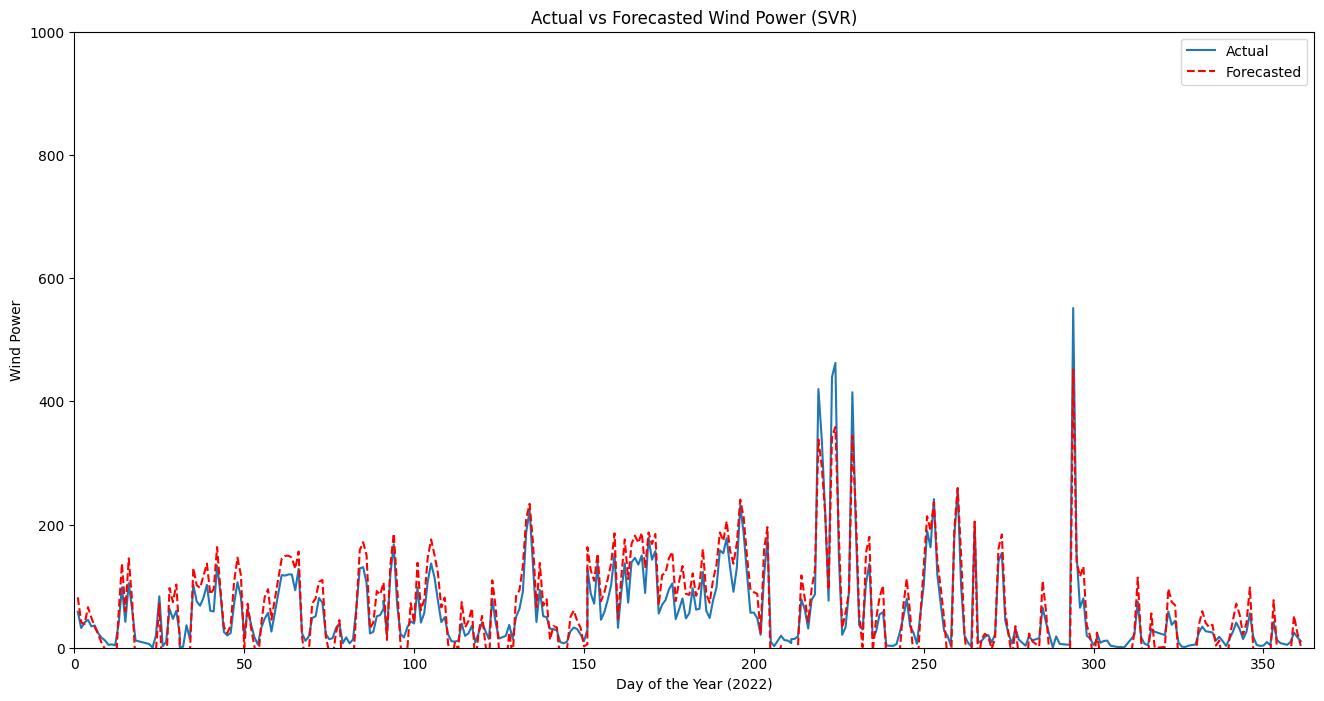

In [ ]:
# Load your dataset
df = pd.read_csv('/content/Parkay_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize SVR model with desired hyperparameters
svr_model = SVR(C=10, gamma='auto', kernel='linear')  # Adjust hyperparameters as needed

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics
mape_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the SVR model
    svr_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = svr_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    mape_list.append(mape)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds
average_mape = np.mean(mape_list)
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

print('Validation set scores:')
print(f"Mean Average Percentage Error (MAPE): {average_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_rmse:.2f}")
print(f"Mean R-squared (R2): {average_r2:.2f}")

# Train the model on the full training set
svr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test)

# Calculate evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Test set scores:')
print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(16, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (SVR)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()

# **SVR Bagging**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVR Metrics:
Mean Absolute Percentage Error (MAPE): 2.97%
Mean Absolute Error (MAE): 30.80
Mean Squared Error (MSE): 1663.27
Root Mean Squared Error (RMSE): 40.75
Mean R-squared (R2): 0.89
Bagging Metrics:
Mean Absolute Percentage Error (MAPE): 2.99%
Mean Absolute Error (MAE): 30.66
Mean Squared Error (MSE): 1681.62
Root Mean Squared Error (RMSE): 40.98
Mean R-squared (R2): 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



SVR Test Set Metrics:
MAPE on Test Set: 6.82%
MAE on Test Set: 31.58
MSE on Test Set: 1485.20
RMSE on Test Set: 38.54
R2 on Test Set: 0.84

Bagging Test Set Metrics:
MAPE on Test Set: 5.78%
MAE on Test Set: 33.05
MSE on Test Set: 1463.62
RMSE on Test Set: 38.26
R2 on Test Set: 0.85


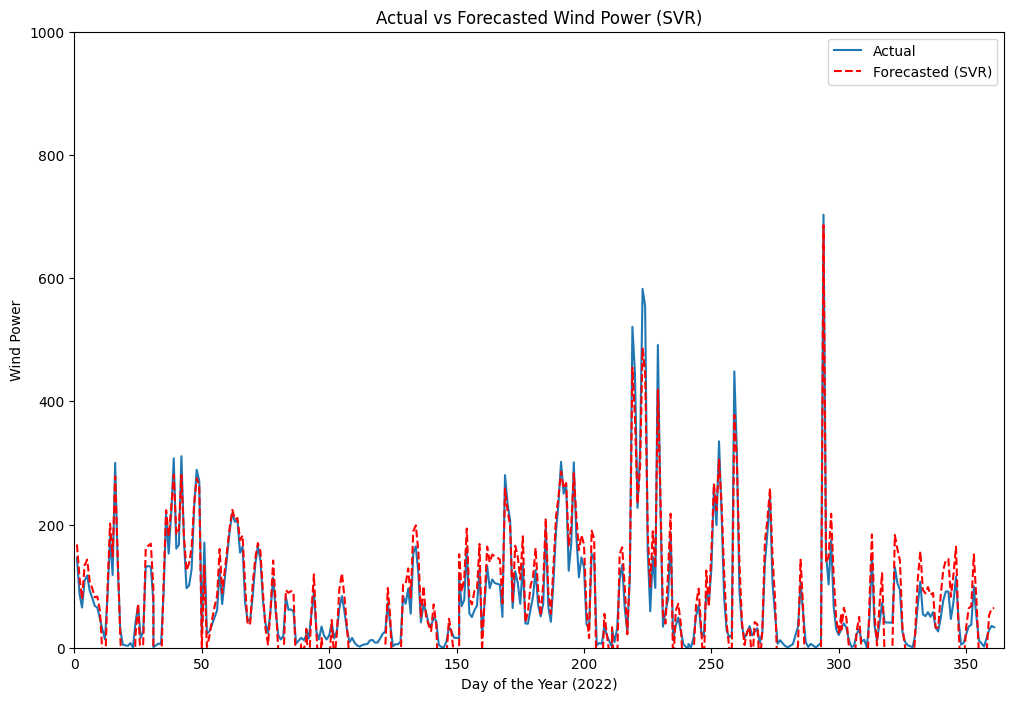

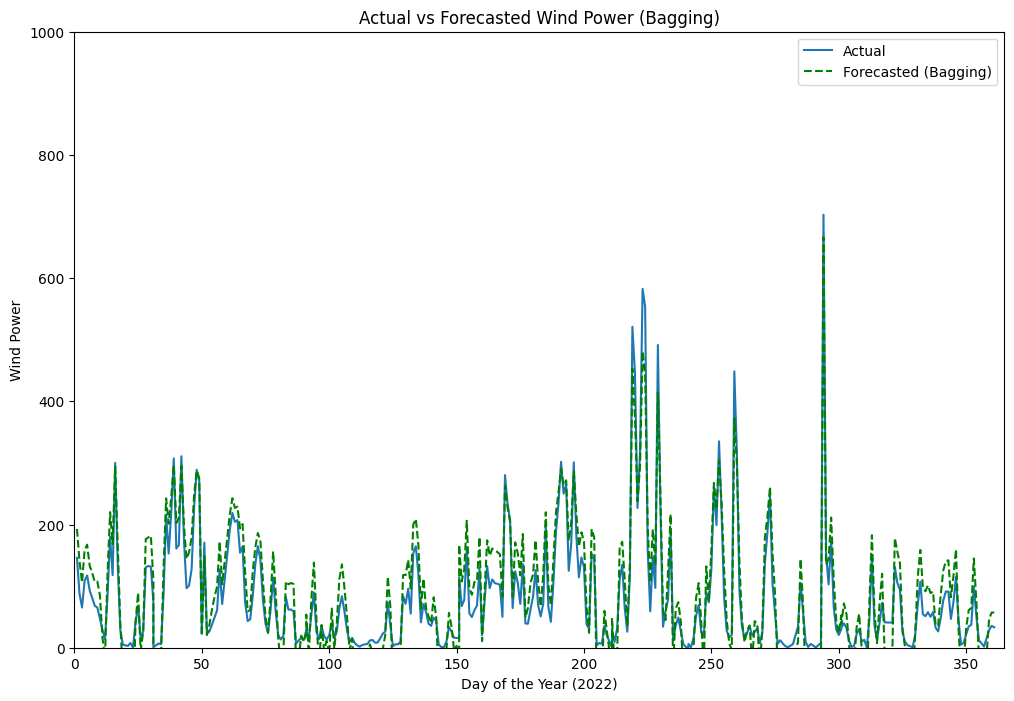

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize SVR model with desired hyperparameters
svr_model = SVR(C=10, gamma='auto', kernel='linear')  # Adjust hyperparameters as needed

# Initialize Time Series Split Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Lists to store evaluation metrics for each fold
svr_mape_scores = []
svr_mae_scores = []
svr_mse_scores = []
svr_rmse_scores = []
svr_r2_scores = []

bagging_mape_scores = []
bagging_mae_scores = []
bagging_mse_scores = []
bagging_rmse_scores = []
bagging_r2_scores = []

# Perform Time Series Cross-Validation
for train_index, test_index in tscv.split(X_train):
    X_train_split, X_test_split = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the SVR model
    svr_model.fit(X_train_split, y_train_split)

    # Train the Bagging Regressor with the SVR model
    bagging_model = BaggingRegressor(base_estimator=svr_model, random_state=42)
    bagging_model.fit(X_train_split, y_train_split)

    # Make predictions on the test set using SVR
    svr_predictions = svr_model.predict(X_test_split)

    # Make predictions on the test set using Bagging
    bagging_predictions = bagging_model.predict(X_test_split)

    # Calculate evaluation metrics for SVR
    svr_mape = mean_absolute_percentage_error(y_test_split, svr_predictions)
    svr_mae = mean_absolute_error(y_test_split, svr_predictions)
    svr_mse = mean_squared_error(y_test_split, svr_predictions)
    svr_rmse = np.sqrt(svr_mse)
    svr_r2 = r2_score(y_test_split, svr_predictions)

    # Calculate evaluation metrics for Bagging
    bagging_mape = mean_absolute_percentage_error(y_test_split, bagging_predictions)
    bagging_mae = mean_absolute_error(y_test_split, bagging_predictions)
    bagging_mse = mean_squared_error(y_test_split, bagging_predictions)
    bagging_rmse = np.sqrt(bagging_mse)
    bagging_r2 = r2_score(y_test_split, bagging_predictions)

    # Append the scores to the respective lists
    svr_mape_scores.append(svr_mape)
    svr_mae_scores.append(svr_mae)
    svr_mse_scores.append(svr_mse)
    svr_rmse_scores.append(svr_rmse)
    svr_r2_scores.append(svr_r2)

    bagging_mape_scores.append(bagging_mape)
    bagging_mae_scores.append(bagging_mae)
    bagging_mse_scores.append(bagging_mse)
    bagging_rmse_scores.append(bagging_rmse)
    bagging_r2_scores.append(bagging_r2)

# Calculate the mean scores across all folds for SVR
svr_mean_mape = np.mean(svr_mape_scores)
svr_mean_mae = np.mean(svr_mae_scores)
svr_mean_mse = np.mean(svr_mse_scores)
svr_mean_rmse = np.mean(svr_rmse_scores)
svr_mean_r2 = np.mean(svr_r2_scores)

# Calculate the mean scores across all folds for Bagging
bagging_mean_mape = np.mean(bagging_mape_scores)
bagging_mean_mae = np.mean(bagging_mae_scores)
bagging_mean_mse = np.mean(bagging_mse_scores)
bagging_mean_rmse = np.mean(bagging_rmse_scores)
bagging_mean_r2 = np.mean(bagging_r2_scores)

# Print the mean evaluation metrics for SVR
print("SVR Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {svr_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {svr_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {svr_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {svr_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {svr_mean_r2:.2f}")

# Print the mean evaluation metrics for Bagging
print("Bagging Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {bagging_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {bagging_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {bagging_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {bagging_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {bagging_mean_r2:.2f}")

# Train the SVR model on the full training set
svr_model.fit(X_train, y_train)

# Train the Bagging model on the full training set
bagging_model.fit(X_train, y_train)

# Make predictions on the test set using SVR
svr_predictions_test = svr_model.predict(X_test)

# Make predictions on the test set using Bagging
bagging_predictions_test = bagging_model.predict(X_test)

# Calculate evaluation metrics for SVR on the test set
svr_mape_test = mean_absolute_percentage_error(y_test, svr_predictions_test)
svr_mae_test = mean_absolute_error(y_test, svr_predictions_test)
svr_mse_test = mean_squared_error(y_test, svr_predictions_test)
svr_rmse_test = np.sqrt(svr_mse_test)
svr_r2_test = r2_score(y_test, svr_predictions_test)

# Calculate evaluation metrics for Bagging on the test set
bagging_mape_test = mean_absolute_percentage_error(y_test, bagging_predictions_test)
bagging_mae_test = mean_absolute_error(y_test, bagging_predictions_test)
bagging_mse_test = mean_squared_error(y_test, bagging_predictions_test)
bagging_rmse_test = np.sqrt(bagging_mse_test)
bagging_r2_test = r2_score(y_test, bagging_predictions_test)

print("\nSVR Test Set Metrics:")
print(f"MAPE on Test Set: {svr_mape_test:.2f}%")
print(f"MAE on Test Set: {svr_mae_test:.2f}")
print(f"MSE on Test Set: {svr_mse_test:.2f}")
print(f"RMSE on Test Set: {svr_rmse_test:.2f}")
print(f"R2 on Test Set: {svr_r2_test:.2f}")

print("\nBagging Test Set Metrics:")
print(f"MAPE on Test Set: {bagging_mape_test:.2f}%")
print(f"MAE on Test Set: {bagging_mae_test:.2f}")
print(f"MSE on Test Set: {bagging_mse_test:.2f}")
print(f"RMSE on Test Set: {bagging_rmse_test:.2f}")
print(f"R2 on Test Set: {bagging_r2_test:.2f}")

# Plot the actual and forecast values for SVR
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], svr_predictions_test, label='Forecasted (SVR)', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (SVR)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()

# Plot the actual and forecast values for Bagging
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], bagging_predictions_test, label='Forecasted (Bagging)', color='green', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Bagging)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


# **SVR Boosting**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize SVR model with the best hyperparameters
svr_model = SVR(kernel='linear', C=10,gamma='auto')

# Initialize Time Series Split Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Lists to store evaluation metrics for each fold
svr_mape_scores = []
svr_mae_scores = []
svr_mse_scores = []
svr_rmse_scores = []
svr_r2_scores = []

boosting_mape_scores = []
boosting_mae_scores = []
boosting_mse_scores = []
boosting_rmse_scores = []
boosting_r2_scores = []

# Perform Time Series Cross-Validation
for train_index, test_index in tscv.split(X_train):
    X_train_split, X_test_split = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the SVR model
    svr_model.fit(X_train_split, y_train_split)

    # Train the AdaBoost model
    boosting_model = AdaBoostRegressor(base_estimator=svr_model, n_estimators=100, random_state=42)
    boosting_model.fit(X_train_split, y_train_split)

    # Make predictions on the test set using SVR
    svr_predictions = svr_model.predict(X_test_split)

    # Make predictions on the test set using AdaBoost
    boosting_predictions = boosting_model.predict(X_test_split)

    # Calculate evaluation metrics for SVR
    svr_mape = mean_absolute_percentage_error(y_test_split, svr_predictions)
    svr_mae = mean_absolute_error(y_test_split, svr_predictions)
    svr_mse = mean_squared_error(y_test_split, svr_predictions)
    svr_rmse = np.sqrt(svr_mse)
    svr_r2 = r2_score(y_test_split, svr_predictions)

    # Calculate evaluation metrics for AdaBoost
    boosting_mape = mean_absolute_percentage_error(y_test_split, boosting_predictions)
    boosting_mae = mean_absolute_error(y_test_split, boosting_predictions)
    boosting_mse = mean_squared_error(y_test_split, boosting_predictions)
    boosting_rmse = np.sqrt(boosting_mse)
    boosting_r2 = r2_score(y_test_split, boosting_predictions)

    # Append the scores to the respective lists
    svr_mape_scores.append(svr_mape)
    svr_mae_scores.append(svr_mae)
    svr_mse_scores.append(svr_mse)
    svr_rmse_scores.append(svr_rmse)
    svr_r2_scores.append(svr_r2)

    boosting_mape_scores.append(boosting_mape)
    boosting_mae_scores.append(boosting_mae)
    boosting_mse_scores.append(boosting_mse)
    boosting_rmse_scores.append(boosting_rmse)
    boosting_r2_scores.append(boosting_r2)

# Calculate the mean scores across all folds
svr_mean_mape = np.mean(svr_mape_scores)
svr_mean_mae = np.mean(svr_mae_scores)
svr_mean_mse = np.mean(svr_mse_scores)
svr_mean_rmse = np.mean(svr_rmse_scores)
svr_mean_r2 = np.mean(svr_r2_scores)

boosting_mean_mape = np.mean(boosting_mape_scores)
boosting_mean_mae = np.mean(boosting_mae_scores)
boosting_mean_mse = np.mean(boosting_mse_scores)
boosting_mean_rmse = np.mean(boosting_rmse_scores)
boosting_mean_r2 = np.mean(boosting_r2_scores)

# Print the mean evaluation metrics for SVR
print("SVR Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {svr_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {svr_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {svr_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {svr_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {svr_mean_r2:.2f}")

# Print the mean evaluation metrics for AdaBoost
print("\nAdaBoost Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {boosting_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {boosting_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {boosting_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {boosting_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {boosting_mean_r2:.2f}")

# Train the SVR model on the entire training data
svr_model.fit(X_train, y_train)

# Train the AdaBoost model on the entire training data
boosting_model.fit(X_train, y_train)

# Make predictions on the test set using SVR
svr_test_predictions = svr_model.predict(X_test)

# Make predictions on the test set using AdaBoost
boosting_test_predictions = boosting_model.predict(X_test)

# Calculate evaluation metrics for the test set
svr_test_mape = mean_absolute_percentage_error(y_test, svr_test_predictions)
svr_test_mae = mean_absolute_error(y_test, svr_test_predictions)
svr_test_mse = mean_squared_error(y_test, svr_test_predictions)
svr_test_rmse = np.sqrt(svr_test_mse)
svr_test_r2 = r2_score(y_test, svr_test_predictions)

boosting_test_mape = mean_absolute_percentage_error(y_test, boosting_test_predictions)
boosting_test_mae = mean_absolute_error(y_test, boosting_test_predictions)
boosting_test_mse = mean_squared_error(y_test, boosting_test_predictions)
boosting_test_rmse = np.sqrt(boosting_test_mse)
boosting_test_r2 = r2_score(y_test, boosting_test_predictions)

# Print the test set evaluation metrics
print("\nTest Set Scores:")
print("SVR Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {svr_test_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {svr_test_mae:.2f}")
print(f"Mean Squared Error (MSE): {svr_test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {svr_test_rmse:.2f}")
print(f"Mean R-squared (R2): {svr_test_r2:.2f}")

print("\nAdaBoost Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {boosting_test_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {boosting_test_mae:.2f}")
print(f"Mean Squared Error (MSE): {boosting_test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {boosting_test_rmse:.2f}")
print(f"Mean R-squared (R2): {boosting_test_r2:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVR Metrics:
Mean Absolute Percentage Error (MAPE): 4.10%
Mean Absolute Error (MAE): 28.96
Mean Squared Error (MSE): 1642.52
Root Mean Squared Error (RMSE): 40.17
Mean R-squared (R2): 0.85

AdaBoost Metrics:
Mean Absolute Percentage Error (MAPE): 4.57%
Mean Absolute Error (MAE): 33.13
Mean Squared Error (MSE): 1549.27
Root Mean Squared Error (RMSE): 39.35
Mean R-squared (R2): 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Test Set Scores:
SVR Metrics:
Mean Absolute Percentage Error (MAPE): 4.09%
Mean Absolute Error (MAE): 28.32
Mean Squared Error (MSE): 1108.99
Root Mean Squared Error (RMSE): 33.30
Mean R-squared (R2): 0.79

AdaBoost Metrics:
Mean Absolute Percentage Error (MAPE): 4.05%
Mean Absolute Error (MAE): 33.03
Mean Squared Error (MSE): 1406.02
Root Mean Squared Error (RMSE): 37.50
Mean R-squared (R2): 0.73


# **SVR trained on Inani testing on Mongla**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

# Load your Inani dataset
inani_df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Load your Mongla dataset
mongla_df = pd.read_csv('/content/Mongla_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
inani_df = inani_df[inani_df['Avg_Power'] != 0]
mongla_df = mongla_df[mongla_df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
inani_df['DY'] = (inani_df['MO'] - 1) * 30 + inani_df['DY']
mongla_df['DY'] = (mongla_df['MO'] - 1) * 30 + mongla_df['DY']

# Split the Inani data into training and test sets
inani_train_df = inani_df[inani_df['YEAR'] <= 2021]  # Training data: 2013-2021
inani_test_df = inani_df[inani_df['YEAR'] == 2022]  # Test data: 2022

# Split the Mongla data into training and test sets
mongla_train_df = mongla_df[mongla_df['YEAR'] <= 2021]  # Training data: 2013-2021
mongla_test_df = mongla_df[mongla_df['YEAR'] == 2022]  # Test data: 2022

# Define X and y for training and testing
X_inani_train = inani_train_df[features]
y_inani_train = inani_train_df[target]
X_inani_test = inani_test_df[features]
y_inani_test = inani_test_df[target]

X_mongla_train = mongla_train_df[features]
y_mongla_train = mongla_train_df[target]
X_mongla_test = mongla_test_df[features]
y_mongla_test = mongla_test_df[target]

# Initialize SVR model
svr_model = SVR(kernel='linear', C=10, gamma = 'auto')  # You can adjust SVR hyperparameters

# Initialize Time Series Cross-Validation for Inani dataset
tscv_inani = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
inani_mape_list = []
inani_mae_list = []
inani_mse_list = []
inani_rmse_list = []
inani_r2_list = []

# Perform Time Series Cross-Validation on the Inani dataset
for train_index, test_index in tscv_inani.split(X_inani_train):
    X_train_cv, X_test_cv = X_inani_train.iloc[train_index], X_inani_train.iloc[test_index]
    y_train_cv, y_test_cv = y_inani_train.iloc[train_index], y_inani_train.iloc[test_index]

    # Train the SVR model
    svr_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = svr_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    inani_mape_list.append(mape)
    inani_mae_list.append(mae)
    inani_mse_list.append(mse)
    inani_rmse_list.append(rmse)
    inani_r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds for the Inani dataset
average_inani_mape = np.mean(inani_mape_list)
average_inani_mae = np.mean(inani_mae_list)
average_inani_mse = np.mean(inani_mse_list)
average_inani_rmse = np.mean(inani_rmse_list)
average_inani_r2 = np.mean(inani_r2_list)

print('Inani dataset validation scores:')
print(f"Mean Average Percentage Error (MAPE): {average_inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_inani_rmse:.2f}")
print(f"Mean R-squared (R2): {average_inani_r2:.2f}")

# Train the SVR model on the full Inani training set
svr_model.fit(X_inani_train, y_inani_train)

# Make predictions on the Inani test set
inani_predictions = svr_model.predict(X_inani_test)

# Calculate evaluation metrics on the Inani test set
inani_mape = mean_absolute_percentage_error(y_inani_test, inani_predictions)
inani_mae = mean_absolute_error(y_inani_test, inani_predictions)
inani_mse = mean_squared_error(y_inani_test, inani_predictions)
inani_rmse = np.sqrt(inani_mse)
inani_r2 = r2_score(y_inani_test, inani_predictions)

print('\nInani dataset test scores:')
print(f"Mean Average Percentage Error (MAPE): {inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {inani_rmse:.2f}")
print(f"Mean R-squared (R2): {inani_r2:.2f}")

# Now, apply the trained SVR model to the Mongla dataset

# Make predictions on the Mongla test set using the model trained on Inani
mongla_predictions = svr_model.predict(X_mongla_test)

# Calculate evaluation metrics on the Mongla test set
mongla_mape = mean_absolute_percentage_error(y_mongla_test, mongla_predictions)
mongla_mae = mean_absolute_error(y_mongla_test, mongla_predictions)
mongla_mse = mean_squared_error(y_mongla_test, mongla_predictions)
mongla_rmse = np.sqrt(mongla_mse)
mongla_r2 = r2_score(y_mongla_test, mongla_predictions)

print('\nMongla dataset test scores using the model trained on Inani:')
print(f"Mean Average Percentage Error (MAPE): {mongla_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mongla_mae:.2f}")
print(f"Mean Squared Error (MSE): {mongla_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {mongla_rmse:.2f}")
print(f"Mean R-squared (R2): {mongla_r2:.2f}")


Inani dataset validation scores:
Mean Average Percentage Error (MAPE): 2.97%
Mean Absolute Error (MAE): 30.80
Mean Squared Error (MSE): 1663.27
Root Mean Squared Error (RMSE): 40.75
Mean R-squared (R2): 0.89

Inani dataset test scores:
Mean Average Percentage Error (MAPE): 6.82%
Mean Absolute Error (MAE): 31.58
Mean Squared Error (MSE): 1485.20
Root Mean Squared Error (RMSE): 38.54
Mean R-squared (R2): 0.84

Mongla dataset test scores using the model trained on Inani:
Mean Average Percentage Error (MAPE): 3.19%
Mean Absolute Error (MAE): 28.00
Mean Squared Error (MSE): 1204.09
Root Mean Squared Error (RMSE): 34.70
Mean R-squared (R2): 0.71


# **SVR tested on Inani dataset testing on Parkay dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

# Load your Inani dataset
inani_df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Load your Mongla dataset
parkay_df = pd.read_csv('/content/Parkay_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
inani_df = inani_df[inani_df['Avg_Power'] != 0]
parkay_df = parkay_df[parkay_df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
inani_df['DY'] = (inani_df['MO'] - 1) * 30 + inani_df['DY']
parkay_df['DY'] = (parkay_df['MO'] - 1) * 30 + parkay_df['DY']

# Split the Inani data into training and test sets
inani_train_df = inani_df[inani_df['YEAR'] <= 2021]  # Training data: 2013-2021
inani_test_df = inani_df[inani_df['YEAR'] == 2022]  # Test data: 2022

# Split the Mongla data into training and test sets
parkay_train_df = parkay_df[parkay_df['YEAR'] <= 2021]  # Training data: 2013-2021
parkay_test_df = parkay_df[parkay_df['YEAR'] == 2022]  # Test data: 2022

# Define X and y for training and testing
X_inani_train = inani_train_df[features]
y_inani_train = inani_train_df[target]
X_inani_test = inani_test_df[features]
y_inani_test = inani_test_df[target]

X_parkay_train = parkay_train_df[features]
y_parkay_train = parkay_train_df[target]
X_parkay_test = parkay_test_df[features]
y_parkay_test = parkay_test_df[target]

# Initialize SVR model
svr_model = SVR(kernel='linear', C=10, gamma = 'auto')  # You can adjust SVR hyperparameters

# Initialize Time Series Cross-Validation for Inani dataset
tscv_inani = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
inani_mape_list = []
inani_mae_list = []
inani_mse_list = []
inani_rmse_list = []
inani_r2_list = []

# Perform Time Series Cross-Validation on the Inani dataset
for train_index, test_index in tscv_inani.split(X_inani_train):
    X_train_cv, X_test_cv = X_inani_train.iloc[train_index], X_inani_train.iloc[test_index]
    y_train_cv, y_test_cv = y_inani_train.iloc[train_index], y_inani_train.iloc[test_index]

    # Train the SVR model
    svr_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = svr_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    inani_mape_list.append(mape)
    inani_mae_list.append(mae)
    inani_mse_list.append(mse)
    inani_rmse_list.append(rmse)
    inani_r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds for the Inani dataset
average_inani_mape = np.mean(inani_mape_list)
average_inani_mae = np.mean(inani_mae_list)
average_inani_mse = np.mean(inani_mse_list)
average_inani_rmse = np.mean(inani_rmse_list)
average_inani_r2 = np.mean(inani_r2_list)

print('Inani dataset validation scores:')
print(f"Mean Average Percentage Error (MAPE): {average_inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_inani_rmse:.2f}")
print(f"Mean R-squared (R2): {average_inani_r2:.2f}")

# Train the SVR model on the full Inani training set
svr_model.fit(X_inani_train, y_inani_train)

# Make predictions on the Inani test set
inani_predictions = svr_model.predict(X_inani_test)

# Calculate evaluation metrics on the Inani test set
inani_mape = mean_absolute_percentage_error(y_inani_test, inani_predictions)
inani_mae = mean_absolute_error(y_inani_test, inani_predictions)
inani_mse = mean_squared_error(y_inani_test, inani_predictions)
inani_rmse = np.sqrt(inani_mse)
inani_r2 = r2_score(y_inani_test, inani_predictions)

print('\nInani dataset test scores:')
print(f"Mean Average Percentage Error (MAPE): {inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {inani_rmse:.2f}")
print(f"Mean R-squared (R2): {inani_r2:.2f}")

# Now, apply the trained SVR model to the Mongla dataset

# Make predictions on the Mongla test set using the model trained on Inani
parkay_predictions = svr_model.predict(X_parkay_test)

# Calculate evaluation metrics on the Mongla test set
parkay_mape = mean_absolute_percentage_error(y_parkay_test, parkay_predictions)
parkay_mae = mean_absolute_error(y_parkay_test, parkay_predictions)
parkay_mse = mean_squared_error(y_parkay_test, parkay_predictions)
parkay_rmse = np.sqrt(parkay_mse)
parkay_r2 = r2_score(y_parkay_test, parkay_predictions)

print('\nParkay dataset test scores using the model trained on Inani:')
print(f"Mean Average Percentage Error (MAPE): {parkay_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {parkay_mae:.2f}")
print(f"Mean Squared Error (MSE): {parkay_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {parkay_rmse:.2f}")
print(f"Mean R-squared (R2): {parkay_r2:.2f}")


Inani dataset validation scores:
Mean Average Percentage Error (MAPE): 2.97%
Mean Absolute Error (MAE): 30.80
Mean Squared Error (MSE): 1663.27
Root Mean Squared Error (RMSE): 40.75
Mean R-squared (R2): 0.89

Inani dataset test scores:
Mean Average Percentage Error (MAPE): 6.82%
Mean Absolute Error (MAE): 31.58
Mean Squared Error (MSE): 1485.20
Root Mean Squared Error (RMSE): 38.54
Mean R-squared (R2): 0.84

Parkay dataset test scores using the model trained on Inani:
Mean Average Percentage Error (MAPE): 5.51%
Mean Absolute Error (MAE): 31.96
Mean Squared Error (MSE): 1470.80
Root Mean Squared Error (RMSE): 38.35
Mean R-squared (R2): 0.72
